In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import signal
from scipy.fft import fft, fftfreq

In [42]:
combined_data = pd.read_csv('../datasets/combined_ecg_data.csv')

# Get just the ECG signal data (all rows, first 187 columns)
ecg_signals = combined_data.iloc[:, :-1]

# Keep the labels separately
labels = combined_data.iloc[:, -1]

In [43]:
# A function to apply bandpass filter to the data with lower (0.5Hz) and upper (40Hz) cutoff frequencies, frequency sampling rate of 125Hz, filter order of 4 and butterworth filter type.
def bandpass_filter(lowercutoff, uppercutoff, fs, order, data=None):
    nyquist = 0.5 * fs
    low = lowercutoff / nyquist
    high = uppercutoff / nyquist
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    filtered_data = scipy.signal.filtfilt(b, a, data)
    return filtered_data


In [44]:
filtered_signals = pd.DataFrame(columns=ecg_signals.columns)

for i in range(len(ecg_signals)):
    filtered_row = bandpass_filter(0.5, 40, 125, 4,  ecg_signals.iloc[i])
    filtered_signals.loc[i] = filtered_row


filtered_signals['label'] = labels

# Save the filtered signals to a new CSV file
filtered_signals.to_csv('../datasets/filtered_ecg_signals.csv', index=False)

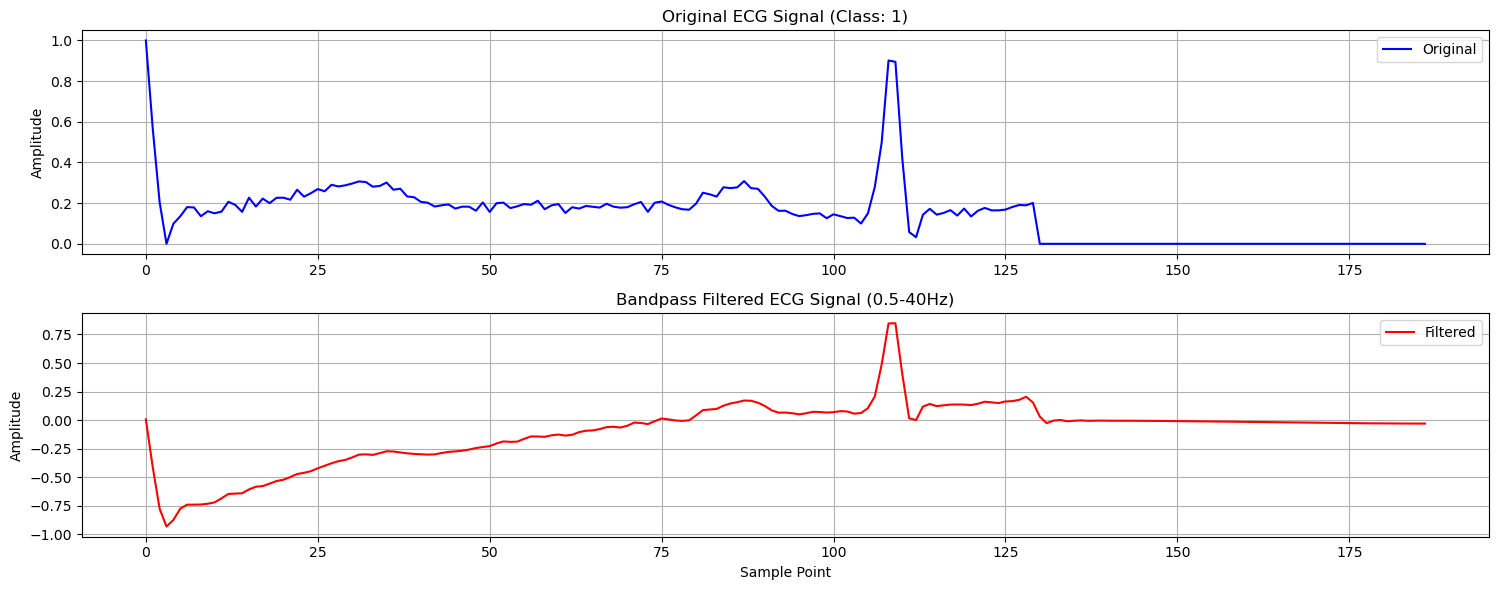

In [45]:
# Pick an example row to visualize (e.g., row 20)
sample_index = 10000

# Get original and filtered signals
original_signal = combined_data.iloc[sample_index, :-1]
filtered_signal = filtered_signals.iloc[sample_index, :-1]

# Create a time axis (187 points)
time = np.arange(len(original_signal))

# Create the plot
plt.figure(figsize=(15, 6))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(time, original_signal, 'b-', label='Original')
plt.title(f'Original ECG Signal (Class: {combined_data.iloc[sample_index, -1]})')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot filtered signal
plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal, 'r-', label='Filtered')
plt.title('Bandpass Filtered ECG Signal (0.5-40Hz)')
plt.xlabel('Sample Point')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


Normal Sample: [ 0.00975187 -0.14391998 -0.46891078 -0.76153599 -0.85555169 -0.8264315
 -0.75871779 -0.70454397 -0.68951509 -0.67949922 -0.65959749 -0.6502557
 -0.64774335 -0.63691482 -0.61737338 -0.59351475 -0.5714142  -0.55424332
 -0.5351416  -0.51185026 -0.49141658 -0.47241372 -0.4517148  -0.43763044
 -0.42850847 -0.40965742 -0.38258401 -0.35673499 -0.32698908 -0.29239351
 -0.26206132 -0.23291271 -0.2029242  -0.18540251 -0.17967464 -0.17279826
 -0.17200404 -0.18567132 -0.2030031  -0.21921633 -0.23731048 -0.25288568
 -0.26268159 -0.26552414 -0.26054767 -0.25327846 -0.24592059 -0.23530961
 -0.22448674 -0.21517406 -0.20307018 -0.19162776 -0.18776037 -0.18524404
 -0.17444952 -0.16047976 -0.15284517 -0.14796479 -0.13786242 -0.12510842
 -0.11658977 -0.11215878 -0.10780786 -0.1028361  -0.09890606 -0.09521236
 -0.0875855  -0.07534318 -0.06722241 -0.07038551 -0.07677714 -0.07647515
 -0.07410354 -0.07412315 -0.0709095  -0.0647672  -0.06107464 -0.05735763
 -0.05123574 -0.04395504 -0.03520147 -

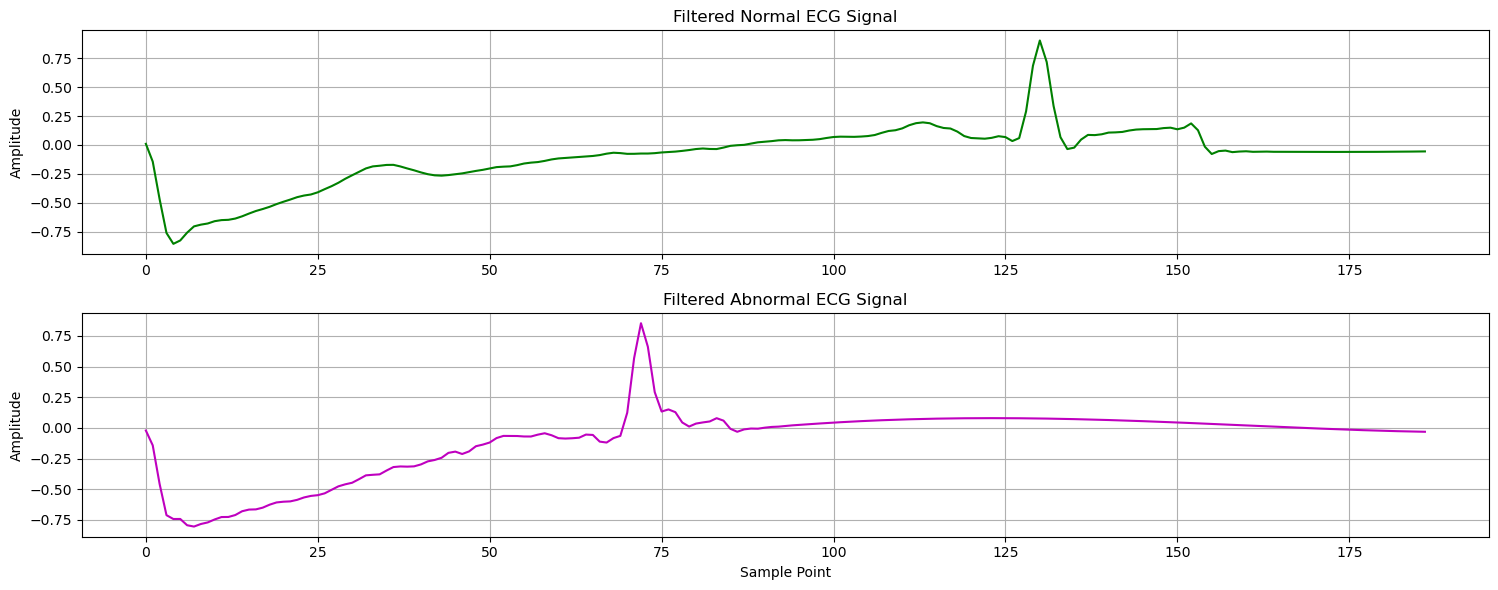

In [46]:
# Find sample indices for normal and abnormal classes
normal_indices = filtered_signals[filtered_signals['label'] == 0].index
abnormal_indices = filtered_signals[filtered_signals['label'] == 1].index


# Select one sample from each class
normal_sample = filtered_signals.iloc[normal_indices[100], :-1].values
abnormal_sample = filtered_signals.iloc[abnormal_indices[100], :-1].values

print(f"Normal Sample: {normal_sample}")
print(f"Abnormal Sample: {abnormal_sample}")

# Create the plot
plt.figure(figsize=(15, 6))

# Plot normal signal
plt.subplot(2, 1, 1)
plt.plot(time, normal_sample, 'g-')
plt.title('Filtered Normal ECG Signal')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot abnormal signal
plt.subplot(2, 1, 2)
plt.plot(time, abnormal_sample, 'm-')
plt.title('Filtered Abnormal ECG Signal')
plt.xlabel('Sample Point')
plt.ylabel('Amplitude')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [47]:
print(filtered_signals.head())

print(filtered_signals.shape)
#last col
print(filtered_signals.iloc[:, -1].value_counts())

print(filtered_signals.tail())


          0         1         2         3         4         5         6  \
0 -0.008763 -0.135806 -0.577641 -0.933554 -0.914556 -0.802527 -0.793689   
1  0.063421 -0.155628 -0.509913 -0.825991 -0.878442 -0.729940 -0.603986   
2  0.022680 -0.112090 -0.397416 -0.691927 -0.824502 -0.812865 -0.754373   
3  0.019383 -0.517860 -0.852588 -0.900991 -0.833111 -0.827430 -0.843862   
4  0.015131 -0.192058 -0.649444 -0.894625 -0.798463 -0.757614 -0.810288   

          7         8         9  ...       178       179       180       181  \
0 -0.799524 -0.782339 -0.773429  ... -0.025436 -0.026514 -0.027526 -0.028469   
1 -0.570665 -0.548560 -0.509061  ... -0.022344 -0.021756 -0.021177 -0.020607   
2 -0.717723 -0.709217 -0.699311  ... -0.123111 -0.119005 -0.114365 -0.109866   
3 -0.824888 -0.809077 -0.804276  ... -0.043941 -0.045268 -0.046491 -0.047605   
4 -0.793197 -0.763684 -0.765459  ... -0.046334 -0.047327 -0.048227 -0.049030   

        182       183       184       185       186  label  
0 -0.02

### Now we move to computing the FFT and focusing on frequency

In [59]:
def apply_fft(signal, fs=125):
    n = len(signal)  # Length of the signal
    fft_result = fft(signal)  # Compute the FFT
    freq = fftfreq(n, 1/fs)  # Frequency bins
    #magnitude
    magnitude = np.abs(fft_result) / n  # Normalize the FFT result
    return freq, magnitude

In [60]:
fft_filtered_signals_normal = filtered_signals.iloc[0:1, :-1].values.flatten()
freq_normal, magnitude_normal = apply_fft(fft_filtered_signals_normal)
fft_filtered_signals_abnormal = filtered_signals.iloc[14000:14001, :-1].values.flatten()
freq_abnormal, magnitude_abnormal = apply_fft(fft_filtered_signals_abnormal)

positive_mask_normal = freq_normal >= 0
positive_freq_normal = freq_normal[positive_mask_normal]
positive_magnitude_normal = magnitude_normal[positive_mask_normal]

positive_mask_abnormal = freq_abnormal >= 0
positive_freq_abnormal = freq_abnormal[positive_mask_abnormal]
positive_magnitude_abnormal = magnitude_abnormal[positive_mask_abnormal]

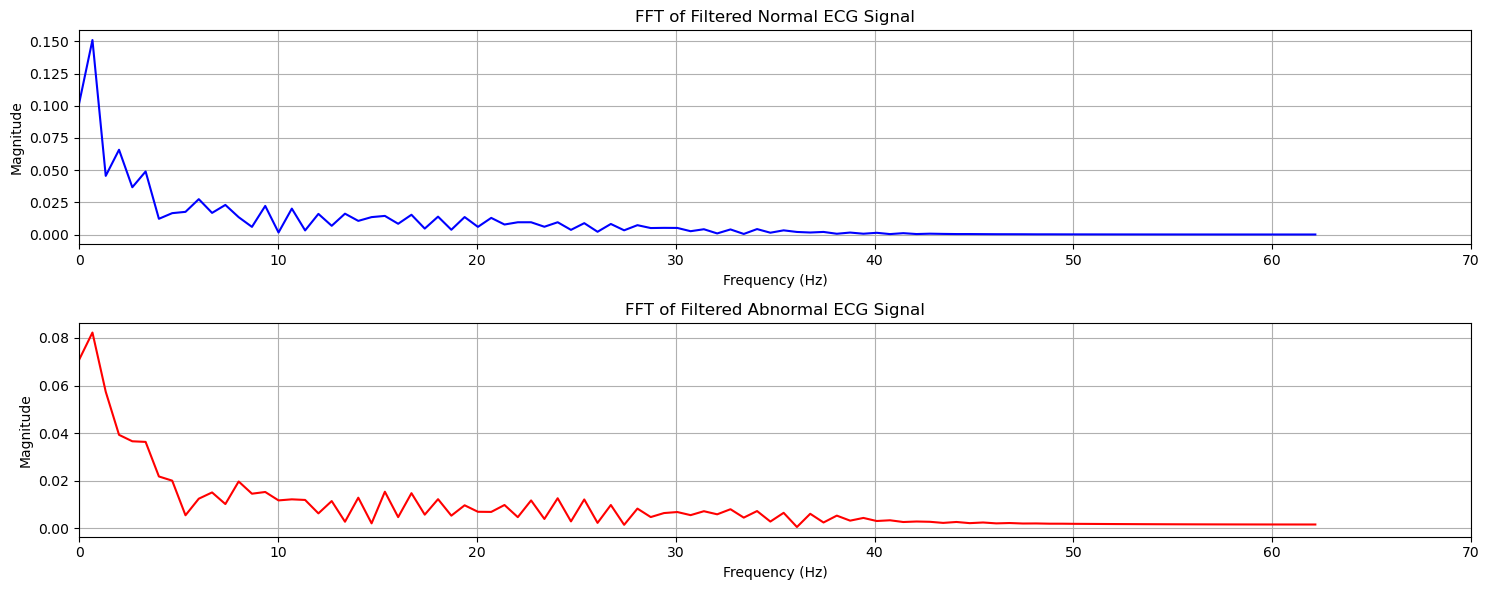

In [62]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(positive_freq_normal, positive_magnitude_normal, 'b-')
plt.title('FFT of Filtered Normal ECG Signal') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 70)  # Limit x-axis to 50Hz


plt.subplot(2, 1, 2)
plt.plot(positive_freq_abnormal, positive_magnitude_abnormal, 'r-')
plt.title('FFT of Filtered Abnormal ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 70)  # Limit x-axis to 50Hz
plt.tight_layout()
plt.show()